Hugi Reyhandani Munggaran

In [ ]:
#Import Library
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## Part 1 Logistic Regression Model

---

A.

In [ ]:
telco = pd.read_csv('telco_churn_data.csv')
telco.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


B. **Categorical Values** : Customer ID, Referred a Friend, Offer, Phone Service, Multiple Lines, Internet Services, Internet Type, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless billing, Payment Method, Gender, Under 30, Senior Citizen, Married, Dependents, City, Churn Value, Churn Category, Churn Reason

**Numerical Values** : Number of Referrals, Tenure in Months, Avg Monhly Long Distance Charges, Avg Monthly GB Download, Age, Number of Dependents, Zipcode, Latitude, Longitude, Population, Monthly Charge, Total Regular Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, CLTV, Total Customer Svc Requests, Product/Service Issues Reported, Customer Satisfaction.

C. Based on the value counts of the 'Churn Value' variable below, it appears that there are two outcome classes: 0 and 1. A value of 0 represents customers who remained with the company while a value of 1 represents customers who left the company. 

For customers who remained with the company(0) is totally 5174 while the customers who left(1) is totally 1869. This suggest that the dataset is Imbalanced between customers who remained with the company and who left the company.

In [ ]:
telco['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

D. The location-related (geographic) variables in the dataset are City, Zip Code, Latitude, Longitude, Population. Thus, those will be removed.

In [ ]:
telco = telco.drop(['City', 'Zip Code', 'Latitude', 'Longitude', 'Population'], axis=1)

E.

In [ ]:
telco= telco.drop(['Internet Type', 'Customer ID'], axis=1)

a). A categorical variable with entirely unique values (such as Customer ID) would not be useful as a predictor in a supervised machine learning model because it would not provide any meaningful information to the model. Each unique value would essentially act as its own category, making it impossible for the model to learn any meaningful patterns or relationships between that variable and the target variable.

Also, including a variable with entirely unique values in a model will lead to overfitting. This is because the model would be able to perfectly predict the target variable for the training data by simply memorizing the values of the unique variable. Meanwhile, the model will perform poorly on new data because the unique values will not providing any important information to the model for making predictions on new data.

F. Churn category and churn reason are not suitable input variables in a model that predicts whether someone will churn, because they provide information about the reason for the customer's churn after they have already churned. In other words, these variables are only available after the customer has already left the company, making them less relevant for predicting churn beforehand.

In a supervised machine learning, the goal is to predict the outcome or target variable based on input variables. In this case, the target variable is whether a customer will churn or not. Since the "Churn Category" and "Churn Reason" variables are based on the outcome variable, they cannot be used as input variables in a supervised machine learning model. 


a).

In [ ]:
telco = telco.drop(['Churn Category', 'Churn Reason'], axis=1)

G. Imputing values for variables with a high percentage of missingness can be dangerous because it may resulting **biases** and **distortions** into the dataset. In this case, variable 'Customer Satisfaction' has a missing value percentage of over 50%, specifically 73.96%. By imputing values for this variable, it could skew the distribution of the variable and leading to an unreliable results and predictions

In [ ]:
round(telco.isnull().sum() / len(telco) * 100,2)

Referred a Friend                     0.00
Number of Referrals                   0.00
Tenure in Months                      0.00
Offer                                 0.00
Phone Service                         0.00
Avg Monthly Long Distance Charges     0.00
Multiple Lines                        0.00
Internet Service                      0.00
Avg Monthly GB Download               0.00
Online Security                       0.00
Online Backup                         0.00
Device Protection Plan                0.00
Premium Tech Support                  0.00
Streaming TV                          0.00
Streaming Movies                      0.00
Streaming Music                       0.00
Unlimited Data                        0.00
Contract                              0.00
Paperless Billing                     0.00
Payment Method                        0.00
Monthly Charge                        0.00
Total Regular Charges                 0.00
Total Refunds                         0.00
Total Extra

In [ ]:
telco = telco.drop(['Customer Satisfaction'], axis=1)

H. Based on the correlation matrix between Total Regular Charges and Tenure in Months (0.826), it appears that there is multicollinearity between these two variables. 

Additionally, the VIF value for Total Regular Charges is quite high at 17.04, which suggests that there is a high degree of correlation between this variable and the other independent variables in the model. When the VIF value is high, it indicates that a large portion of the variance in one independent variable is explained by the other independent variables in the model.

In this case, it may be appropriate to remove Total Regular Charges from the analysis. 



In [ ]:
# Select only numeric columns
numericCols = telco.select_dtypes(include='number').columns
numericCols = numericCols.drop(['Churn Value']) 
cormat = telco[numericCols].corr()
cormat

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
Number of Referrals,1.000000,0.326975,0.006336,0.024131,0.016020,0.250378,0.024756,0.086958,0.216190,-0.025141,0.278003,0.122843,-0.140121,-0.112472
Tenure in Months,0.326975,1.000000,0.014596,0.031410,0.231389,0.826074,0.059021,0.330911,0.674149,0.009927,0.108237,0.396292,-0.200989,-0.155561
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.029658,0.138439,0.069500,-0.018644,0.028602,0.599828,-0.011749,-0.007324,0.023858,0.016678,-0.001392
Avg Monthly GB Download,0.024131,0.031410,-0.029658,1.000000,0.392364,0.208882,0.001431,0.404215,0.000372,-0.373632,0.117269,0.016595,0.064806,0.048205
Monthly Charge,0.016020,0.231389,0.138439,0.392364,1.000000,0.636000,0.032154,0.319583,0.235441,0.148281,-0.139753,0.092075,0.119970,0.103774
Total Regular Charges,0.250378,0.826074,0.069500,0.208882,0.636000,1.000000,0.039558,0.441563,0.610185,0.059684,0.022535,0.341947,-0.118745,-0.087749
Total Refunds,0.024756,0.059021,-0.018644,0.001431,0.032154,0.039558,1.000000,0.024248,0.028113,0.024168,0.014023,0.007992,-0.010620,-0.012822
Total Extra Data Charges,0.086958,0.330911,0.028602,0.404215,0.319583,0.441563,0.024248,1.000000,0.244896,-0.140663,0.077710,0.127702,0.014048,-0.000883
Total Long Distance Charges,0.216190,0.674149,0.599828,0.000372,0.235441,0.610185,0.028113,0.244896,1.000000,0.003065,0.068966,0.282189,-0.120352,-0.097072
Age,-0.025141,0.009927,-0.011749,-0.373632,0.148281,0.059684,0.024168,-0.140663,0.003065,1.000000,-0.119000,-0.001826,0.063407,0.042983


In [ ]:
# Calculate the VIF for each numeric column
vif = pd.DataFrame()
vif['features'] = numericCols
vif['VIF'] = [variance_inflation_factor(telco[numericCols].values, i) for i in range(len(numericCols))]

vif

,features,VIF
0,Number of Referrals,1.715543
1,Tenure in Months,16.758447
2,Avg Monthly Long Distance Charges,8.137302
3,Avg Monthly GB Download,3.382116
4,Monthly Charge,19.442271
5,Total Regular Charges,17.043267
6,Total Refunds,1.070771
7,Total Extra Data Charges,1.681648
8,Total Long Distance Charges,8.601937
9,Age,9.262555


In [ ]:
# Drop Total Regular Charges
telco = telco.drop('Total Regular Charges', axis=1)

I. After analyzing my categorical input, I found that only 'Churn Value' was in a suitable format for logistic regression. All other variables needed to be converted into binary dummy variables with values of 0 and 1. This conversion is necessary for building a logistic regression model, as categorical variables must be represented numerically to be used in the analysis.

In [ ]:
# Select categorical columns to be dummified
cat_cols = ['Referred a Friend', 'Under 30', 'Offer', 'Phone Service', 'Multiple Lines',
            'Internet Service', 'Online Security', 'Online Backup',
            'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
            'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
            'Paperless Billing', 'Payment Method', 'Gender', 'Senior Citizen', 'Married','Dependents']

# Create dummies and drop one level for each categorical column
telco_dummies = pd.get_dummies(telco, columns=cat_cols, drop_first=True)

telco_dummies

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,...,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Senior Citizen_Yes,Married_Yes,Dependents_Yes
0,0,1,0.00,9,41.236,0.00,0.0,0.00,78,0,...,0,0,0,1,0,0,1,1,0,0
1,1,8,48.85,19,83.876,0.00,120.0,390.80,74,1,...,0,0,0,1,1,0,0,1,1,1
2,0,18,11.33,57,99.268,45.61,0.0,203.94,71,3,...,1,0,0,1,0,0,1,1,0,1
3,1,25,19.76,13,102.440,13.43,327.0,494.00,78,1,...,0,0,0,1,0,0,0,1,1,1
4,1,37,6.33,15,79.560,0.00,430.0,234.21,80,1,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.150,19.31,0.0,1639.44,30,0,...,0,0,1,1,0,0,0,0,0,0
7039,1,24,36.05,24,84.800,48.23,0.0,865.20,38,2,...,1,1,0,1,0,1,1,0,1,1
7040,4,72,29.66,59,103.200,45.38,4344.0,2135.52,30,2,...,0,1,0,1,1,0,0,0,1,1
7041,1,11,0.00,17,29.600,27.24,0.0,0.00,32,2,...,1,0,0,1,0,0,0,0,1,1


J.

In [ ]:
# Split the data into training and testing sets (60/40 split)
train_data, test_data = train_test_split(telco_dummies, test_size=0.4, random_state=1997)


I chose the seed value of 1997 because I was born in this year!

In [ ]:
# Groupby Churn Value
telco_dummies.groupby('Churn Value').mean()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,...,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Senior Citizen_Yes,Married_Yes,Dependents_Yes
Churn Value,,,,,,,,,,,,,,,,,,,,,
0,2.468690,37.591225,22.883572,19.915733,61.265124,2.122279,275.935481,862.952107,45.344414,0.595284,...,0.426169,0.267491,0.354658,0.535562,0.454387,0.046966,0.507344,0.128721,0.528218,0.293970
1,0.521134,17.979133,23.167635,24.419476,77.369727,1.518983,285.596501,433.917549,49.735688,0.118245,...,0.266988,0.088818,0.025682,0.749064,0.212948,0.075976,0.497592,0.254682,0.357945,0.056715


Here are my speculations on the impact of three independent variables based on the mean values:

**Monthly Charge**: The mean monthly charge of customers who churned was higher than that of customers who did not churn. This suggests that customers who are paying higher monthly charges are more likely to churn, probably because they are dissatisfied with the value they are receiving for their money.

**Tenure in Months**: The mean tenure of customers who churned was lower than that of customers who did not churn, which indicates that customers who have been with the company for a shorter period of time are more likely to churn. This could be because new customers may be more likely to explore other options and switch providers if they are not satisfied with their service.

Lastly, **Unlimited Data** is another variable that may have a strong impact on customer churn. Looking at the mean values, it appears that customers who had unlimited data had a lower churn rate compared to those who did not have unlimited data. This suggests that offering unlimited data may increase customer loyalty and reduce the likelihood of churn.


#### Iteration #1

---

L. SM Models

In [ ]:
y_train = train_data['Churn Value'] # Outcome Churn Value
X_train = train_data.drop('Churn Value', axis=1) #Input Variable 

# Add a constant to the input variables
X_train = sm.add_constant(X_train)

# Build the logistic regression model
logit_model = sm.Logit(y_train, X_train)

# Fit the model to the training data
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.216941
         Iterations 9


M. a.) The numeric variables with high p-values (p-value > 0.05) in the logistic regression model are:

- Avg Monthly Long Distance Charges (p-value = 0.370)
- Avg Monthly GB Download (p-value = 0.113)
- Total Refunds (p-value = 0.923)
- Total Extra Data Charges (p-value = 0.965)
- Total Long Distance Charges (p-value = 0.663)
- Age (p-value = 0.526)
- Number of Dependents (p-value = 0.874)
- CLTV (p-value = 0.795)

b.) The categorical variables with high p-values (p-value > 0.05) in the logistic regression model are:

- Under 30_Yes (p-value = 0.195)
- Offer_Offer B (p-value = 0.610)
- Offer_Offer C (p-value = 0.210)
- Multiple Lines_Yes  (p-value = 0.166)
- Device Protection Plan_Yes  (p-value = 0.634)
- Streaming TV_Yes  (p-value = 0.066)
- Streaming Movies_Yes (p-value = 0.084)
- Streaming Music_Yes  (p-value = 0.640)
- Paperless Billing_Yes (p-value = 0.055)
- Payment Method_Credit Card (p-value = 0.699)
- Gender_Male (p-value = 0.706)


In [ ]:
# Print the summary of the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4184
Method:                           MLE   Df Model:                           40
Date:                Sat, 25 Mar 2023   Pseudo R-squ.:                  0.6230
Time:                        17:12:33   Log-Likelihood:                -916.57
converged:                       True   LL-Null:                       -2431.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5348      0.540     -4.690      0.000      -3.594      -1.475
Number of Referrals                  -0.6083      0.057    -10

N. SM Models

In [ ]:
# drop variables according to previous quesiton
X_train2 = X_train.drop(['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 
                         'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Number of Dependents', 
                         'CLTV', 'Under 30_Yes', 'Offer_Offer B', 'Offer_Offer C', 'Multiple Lines_Yes', 
                         'Device Protection Plan_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes', 'Paperless Billing_Yes',
                         'Payment Method_Credit Card', 'Gender_Male'], axis=1)
y_train = train_data['Churn Value']

# Fit the logistic regression model
logit_model2 = sm.Logit(y_train, X_train2).fit()



Optimization terminated successfully.
         Current function value: 0.219330
         Iterations 9


a.)

In [ ]:
print(logit_model2.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4203
Method:                           MLE   Df Model:                           21
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.6188
Time:                        14:05:38   Log-Likelihood:                -926.67
converged:                       True   LL-Null:                       -2431.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.4968      0.312     -7.994      0.000      -3.109      -1.885
Number of Referrals                -0.6067      0.057    -10.673    

O. Scikit-Learn model

In [ ]:
# Create a logistic regression object
logreg = LogisticRegression()

# Drop Const as it not required in Scikit-learn model
X_train2 = X_train2.drop(['const'], axis=1)

# Fit the logistic regression model using X_train2 and y_train
result2 = logreg.fit(X_train2, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


P. After evaluating the performance of my model using the test set, the following results were obtained from the confusion matrix:\
a.) Accuracy rate: 0.897 \
b.) Sensitivity rate: 0.762\
c.) Specificity rate: 0.947\
d.) Precision: 0.843\
e.) Balanced accuracy: 0.855

In [ ]:
# Remove the dropped columns from the test set and add y_test as outcome variable
X_test2 = test_data.drop(['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 
                          'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Number of Dependents', 
                          'CLTV', 'Under 30_Yes', 'Offer_Offer B', 'Offer_Offer C', 'Multiple Lines_Yes', 
                          'Device Protection Plan_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes', 'Paperless Billing_Yes',
                          'Payment Method_Credit Card', 'Gender_Male', 'Churn Value'], axis=1)
y_test = test_data['Churn Value']

# Make predictions on the test set using the fitted model
y_pred = result2.predict(X_test2)
# confusion matrix
confmat = confusion_matrix(y_test, y_pred)
# accuracy rate
accuracy = accuracy_score(y_test, y_pred)
# sensitivity rate
sensitivity = confmat [1,1]/(confmat [1,0]+confmat [1,1])
# specificity rate
specificity = confmat [0,0]/(confmat [0,1]+confmat [0,0])
# precision
precision = confmat [1,1]/(confmat [0,1]+confmat [1,1])
# balanced accuracy
balanced_accuracy = (sensitivity+specificity)/2

print(confmat)
print("Accuracy rate: {:.3f}".format(accuracy))
print("Sensitivity rate: {:.3f}".format(sensitivity))
print("Specificity rate: {:.3f}".format(specificity))
print("Precision: {:.3f}".format(precision))
print("Balanced accuracy: {:.3f}".format(balanced_accuracy))


Confusion matrix:
[[1949  108]
 [ 181  580]]
Accuracy rate: 0.897
Sensitivity rate: 0.762
Specificity rate: 0.947
Precision: 0.843
Balanced accuracy: 0.855


Q.\
a.)The purpose of comparing the model's accuracy against the training set and the test set is to evaluate the performance of the model in terms of its ability to generalize well to new, unseen data. If the model has high accuracy on the training set but lower accuracy on the test set, it may be overfitting to the training data and not generalizing well to new data. In contrast, if the model has similar accuracy on both the training and test sets, it indicates that the model is not overfitting and is able to generalize well to new data.

b.) In this case, the comparison of those values suggests that the model performs similarly well on both the training and test sets since the accuracy percentages are very similar. This means that the model is not overfit to the training data and is generalizing well to new, unseen data.

In [ ]:
# Make predictions on the train set 
y_train_pred = logreg.predict(X_train2)
# accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Results
print("Accuracy on the training set: {:.3f}".format(train_accuracy))
print("Accuracy on the test set: {:.3f}".format(test_accuracy))

Accuracy on the training set: 0.909
Accuracy on the test set: 0.897


R.\
a.) The output of the prediction for Jayson Tatum is 0, which indicates that the model predicted that this Jayson is unlikely to churn, or in other words, is likely to stay with the company. So he will not take the return offer.

In [ ]:
# Create a dataframe for the new customer name Jayson Tatum
Jayson_Tatum = pd.DataFrame({
    'Number of Referrals': [2],
    'Tenure in Months': [12],
    'Monthly Charge': [70],
    'Total Customer Svc Requests': [1],
    'Product/Service Issues Reported': [0],
    'Referred a Friend_Yes': [0],
    'Offer_Offer A': [0],
    'Offer_Offer D': [0],
    'Offer_Offer E': [1],
    'Phone Service_Yes': [1],
    'Internet Service_Yes': [0],
    'Online Security_Yes': [0],
    'Online Backup_Yes': [0],
    'Premium Tech Support_Yes': [0],
    'Unlimited Data_Yes': [0],
    'Contract_One Year': [1],
    'Contract_Two Year': [0],
    'Payment Method_Mailed Check': [0],
    'Senior Citizen_Yes': [0],
    'Married_Yes': [1],
    'Dependents_Yes': [0]
})

# Make a prediction using the logistic regression model
JayTatumPrediction = result2.predict(Jayson_Tatum)

print(JayTatumPrediction)


[0]


b.) Based on the provided output, the probability is 0.3043.  Since this probability is less than 0.5, the model predicts that Jayson Tatum is less likely to churn.

In [ ]:
# Make a prediction using the logistic regression model
JayTatumProb = result2.predict_proba(Jayson_Tatum)

# Print the predicted probability of churn (class 1)
print(JayTatumProb[0][1])


0.30430418082133204


S. It is important to use values within the range of the dataset used to build a logistic regression model to make predictions because the model only "knows" the relationships between the inputs and the outcome for the data that it has been trained on. Extrapolating beyond this range can lead to unreliable predictions as the relationship between the inputs and the outcome may not hold for values outside of the dataset range.

a.) Based on the provided output, the logistic regression model predicted that Mary is very likely to churn with a probability of 0.99. This outcome highlights the potential danger of extrapolating beyond the range of the data used to train the model, as the numeric input values for Mary were outside the range of the original dataset. Extrapolation can lead to unreliable predictions, as the relationship between the input variables and the outcome may change at other ranges of values, resulting in inaccurate predictions. 

In [ ]:
# Check the range of the dataset
X_train2.describe()

,Number of Referrals,Tenure in Months,Monthly Charge,Total Customer Svc Requests,Product/Service Issues Reported,Referred a Friend_Yes,Offer_Offer A,Offer_Offer D,Offer_Offer E,Phone Service_Yes,...,Online Security_Yes,Online Backup_Yes,Premium Tech Support_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Payment Method_Mailed Check,Senior Citizen_Yes,Married_Yes,Dependents_Yes
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,1.967811,32.637160,65.699128,1.341065,0.300592,0.461065,0.071006,0.086627,0.113136,0.902485,...,0.284260,0.348639,0.287337,0.381538,0.221065,0.271479,0.055621,0.165917,0.487574,0.230296
std,3.014785,24.610598,30.783678,1.449883,0.699406,0.498541,0.256865,0.281321,0.316797,0.296693,...,0.451115,0.476596,0.452574,0.485822,0.415013,0.444775,0.229216,0.372050,0.499905,0.421072
min,0.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,72.332000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,56.000000,90.948000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,11.000000,72.000000,120.848000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
 # Create a new dataframe with values outside the range of the original dataset
Mary = pd.DataFrame({
    'Number of Referrals': [12],
    'Tenure in Months': [80],
    'Monthly Charge': [200],
    'Total Customer Svc Requests': [15],
    'Product/Service Issues Reported': [8],
    'Referred a Friend_Yes': [1],
    'Offer_Offer A': [0],
    'Offer_Offer D': [1],
    'Offer_Offer E': [0],
    'Phone Service_Yes': [1],
    'Internet Service_Yes': [1],
    'Online Security_Yes': [1],
    'Online Backup_Yes': [1],
    'Premium Tech Support_Yes': [1],
    'Unlimited Data_Yes': [1],
    'Contract_One Year': [0],
    'Contract_Two Year': [1],
    'Payment Method_Mailed Check': [0],
    'Senior Citizen_Yes': [1],
    'Married_Yes': [1],
    'Dependents_Yes': [1]
})

# Make a prediction using the logistic regression model
MaryPredict = result2.predict(Mary)

print(MaryPredict)


[1]


In [ ]:
# Make a prediction using the logistic regression model
MaryProb = result2.predict_proba(Mary)

# Print the predicted probability of churn (class 1)
print(MaryProb[0][1])

0.9999906280183373



## Part 2 Random Forest Model

---

T. Re-Import Dataset

In [ ]:
# Re Import Dataset with new dataframe
telco2 = pd.read_csv('telco_churn_data.csv')

U. Variable removal

In [ ]:
# Drop the same as variable as Part I
telco2 = telco2.drop(['City', 'Zip Code', 'Latitude', 'Longitude', 'Population','Total Regular Charges','Internet Type', 'Customer ID','Churn Category', 'Churn Reason','Customer Satisfaction'], axis=1)

V. Dummify The Categorical Input

In [ ]:
# Select categorical columns to be dummified
cat_cols2 = ['Referred a Friend', 'Under 30', 'Offer', 'Phone Service', 'Multiple Lines',
            'Internet Service', 'Online Security', 'Online Backup',
            'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
            'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
            'Paperless Billing', 'Payment Method', 'Gender', 'Senior Citizen', 'Married','Dependents']

# Create dummies and drop one level for each categorical column
telco_dummies2 = pd.get_dummies(telco2, columns=cat_cols2, drop_first=False)

telco_dummies2

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,...,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,1,0.00,9,41.236,0.00,0.0,0.00,78,0,...,0,0,0,1,0,1,1,0,1,0
1,1,8,48.85,19,83.876,0.00,120.0,390.80,74,1,...,1,0,1,0,0,1,0,1,0,1
2,0,18,11.33,57,99.268,45.61,0.0,203.94,71,3,...,0,0,0,1,0,1,1,0,0,1
3,1,25,19.76,13,102.440,13.43,327.0,494.00,78,1,...,0,0,1,0,0,1,0,1,0,1
4,1,37,6.33,15,79.560,0.00,430.0,234.21,80,1,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.150,19.31,0.0,1639.44,30,0,...,0,0,1,0,1,0,1,0,1,0
7039,1,24,36.05,24,84.800,48.23,0.0,865.20,38,2,...,0,1,0,1,1,0,0,1,0,1
7040,4,72,29.66,59,103.200,45.38,4344.0,2135.52,30,2,...,1,0,1,0,1,0,0,1,0,1
7041,1,11,0.00,17,29.600,27.24,0.0,0.00,32,2,...,0,0,1,0,1,0,0,1,0,1


W. Re-Partition the Data with same seed value as in Part 1

In [ ]:
# Split the data into training and testing sets (60/40 split)
train_data, test_data = train_test_split(telco_dummies2, test_size=0.4, random_state=1997)

X. Based on the results of the GridSearch CV, the optimal hyperparameters for the model appear to be 'max_depth' of 20, 'max_features' of 'auto', 'min_samples_leaf' of 1, 'min_samples_split' of 5, and 'n_estimators' of 200.

In [ ]:
X_train = train_data.drop('Churn Value', axis=1) # Input
y_train = train_data['Churn Value'] # Output

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=1997)

# Define the hyperparameter grid 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best hyperparameter settings
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.9069822485207102


Y. The random forest model ranked the variables in order of importance based on their contribution to Gini impurity reduction. The table above shows the feature importance for each variable in descending order, with the Total Customer Svc Requests and Product/Service Issues Reported being the top two important variables with score equal to 0.168467 and 0.071202 respectively and the least important variables are Phone Service_Yes and Offer_Offer A with total score equal to 0.001529 and 0.001071 respectively.

In [ ]:
# Extract feature importances from the trained model
importances = grid_search.best_estimator_.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importances

,Feature,Importance
0,Total Customer Svc Requests,0.168467
1,Product/Service Issues Reported,0.071202
2,Contract_Month-to-Month,0.070489
3,Tenure in Months,0.070008
4,Monthly Charge,0.069359
...,...,...
56,Offer_Offer D,0.002785
57,Phone Service_No,0.001762
58,Offer_Offer C,0.001575
59,Phone Service_Yes,0.001529


Z. After evaluating the performance of my random forest model using the test set, the following results were obtained from the confusion matrix:\
a.) Accuracy rate: 0.905\
b.) Sensitivity rate: 0.733\
c.) Specificity rate: 0.968\
d.) Precision: 0.894\
e.) Balanced accuracy: 0.851

In [ ]:
X_test = test_data.drop('Churn Value', axis=1) # Input Test
y_test = test_data['Churn Value'] # Output Test

# Create a random forest with best hyperparameters according to Question X
rf = RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=1997)
rf.fit(X_train, y_train)

# Make predictions on the test set using the fitted model
y_pred = rf.predict(X_test)
# confusion matrix
confmat = confusion_matrix(y_test, y_pred)
# accuracy rate
accuracy = accuracy_score(y_test, y_pred)
# sensitivity rate
sensitivity = confmat[1, 1] / (confmat[1, 0] + confmat[1, 1])
# specificity rate
specificity = confmat[0, 0] / (confmat[0, 1] + confmat[0, 0])
# precision
precision = confmat[1, 1] / (confmat[0, 1] + confmat[1, 1])
# balanced accuracy
balanced_accuracy = (sensitivity + specificity) / 2

print(confmat)
print("Accuracy rate: {:.3f}".format(accuracy))
print("Sensitivity rate: {:.3f}".format(sensitivity))
print("Specificity rate: {:.3f}".format(specificity))
print("Precision: {:.3f}".format(precision))
print("Balanced accuracy: {:.3f}".format(balanced_accuracy))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[1991   66]
 [ 203  558]]
Accuracy rate: 0.905
Sensitivity rate: 0.733
Specificity rate: 0.968
Precision: 0.894
Balanced accuracy: 0.851


AA. A training accuracy of 99.15% and a test accuracy of 90.45% suggest that the model is performing well on both sets of data (the scores are in the same "ballpark"). The slight difference in accuracy between the training and test sets indicates that there may be some overfitting, but it does not appear to be significant. Overall, the model seems to have learned the patterns in the data and is making accurate predictions on new, unseen data.

In [ ]:
# Evaluate model accuracy on training set
trainacc = rf.score(X_train, y_train)

# Evaluate model accuracy on test set
testacc = rf.score(X_test, y_test)

print('Training Accuracy:', trainacc )
print('Test Accuracy:', testacc)

Training Accuracy: 0.9914792899408285
Test Accuracy: 0.904542228530873


In [ ]:
telco_dummies2.to_csv('telco_dummies2.csv', index=False)

BB. Based on the input features and the trained random forest model, the model predicts that Jayson Tatum will not churn.

In [ ]:
# Create JaysonTatum input DataFrame
JaysonTatum = pd.DataFrame({
    'Number of Referrals': [1],
    'Tenure in Months': [10],
    'Avg Monthly Long Distance Charges': [20],
    'Avg Monthly GB Download': [50],
    'Monthly Charge': [70],
    'Total Refunds': [0],
    'Total Extra Data Charges': [0],
    'Total Long Distance Charges': [80],
    'Age': [30],
    'Number of Dependents': [0],
    'CLTV': [5000],
    'Total Customer Svc Requests': [2],
    'Product/Service Issues Reported': [0],
    'Referred a Friend_No': [1],
    'Referred a Friend_Yes': [0],
    'Under 30_No': [0],
    'Under 30_Yes': [1],
    'Offer_None': [0],
    'Offer_Offer A': [0],
    'Offer_Offer B': [0],
    'Offer_Offer C': [1],
    'Offer_Offer D': [0],
    'Offer_Offer E': [0],
    'Phone Service_No': [0],
    'Phone Service_Yes': [1],
    'Multiple Lines_No': [1],
    'Multiple Lines_Yes': [0],
    'Internet Service_No': [0],
    'Internet Service_Yes': [1],
    'Online Security_No': [1],
    'Online Security_Yes': [0],
    'Online Backup_No': [1],
    'Online Backup_Yes': [0],
    'Device Protection Plan_No': [1],
    'Device Protection Plan_Yes': [0],
    'Premium Tech Support_No': [1],
    'Premium Tech Support_Yes': [0],
    'Streaming TV_No': [0],
    'Streaming TV_Yes': [1],
    'Streaming Movies_No': [0],
    'Streaming Movies_Yes': [1],
    'Streaming Music_No': [1],
    'Streaming Music_Yes': [0],
    'Unlimited Data_No': [1],
    'Unlimited Data_Yes': [0],
    'Contract_Month-to-Month': [0],
    'Contract_One Year': [1],
    'Contract_Two Year': [0],
    'Paperless Billing_No': [0],
    'Paperless Billing_Yes': [1],
    'Payment Method_Bank Withdrawal': [1],
    'Payment Method_Credit Card': [0],
    'Payment Method_Mailed Check': [0],
    'Gender_Female': [1],
    'Gender_Male': [0],
    'Senior Citizen_No': [1],
    'Senior Citizen_Yes': [0],
    'Married_No': [1],
    'Married_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0]
})

# Model Predict
churn_status = rf.predict(JaysonTatum)

# Print the predicted churn status
if churn_status == 0:
    print("The model predicts that Jayson Tatum will not churn.")
else:
    print("The model predicts that Jayson Tatum will churn.")



The model predicts that Jayson Tatum will not churn.


CC. There are several potential applications for a model that can predict whether a customer will accept a particular offer or how likely they are to accept it. For Instance, in a marketing side, the telephone company can use this information to tailor their promotions and advertising efforts to the customer that are most likely to respond positively. This can lead to more effective use of resources, increased customer engagement, and higher revenues. Also an operations side, the model can be used to identify the customer that are most likely to churn, allowing the company to proactively reach out to these customers and offer them incentives to stay. This can help reduce customer attrition, increase customer satisfaction, and improve overall retention rates. Additionally, the model can be used to identify patterns in customer behavior and preferences, which can be used to inform product development and innovation efforts.


## Part 3 Wildcard

---

####For this review, I selected Dua Coffee, an Indonesian coffee shop located in Washington DC. To conduct the analysis, I used a review from Yelp and a  freewordcloudgenerator.com as my wordcloud tool.####

Based on the word cloud generated from the Yelp reviews for Dua Coffee , it seems that customers appreciate the unique and flavorful coffee offerings, as well as the cozy and "cute" ambiance of the coffee shop. Words such as "Indonesian", "coffee", "kopi," and "latte" feature prominently in the cloud, emphasizing the cafe's focus on Indonesian specialty coffee. The reviews also mention the friendliness and efficiency of the staff, with words such as "service" and "friendly" appearing frequently. Reviewers also note the "small" size of the cafe and limited "seating", which suggests that the coffee shop may be better suited for a grab-and-go coffee rather than a long stay. In addition, the word "empanadas" also appears prominently in the word cloud, indicating that it is one of a popular food menu item among customers





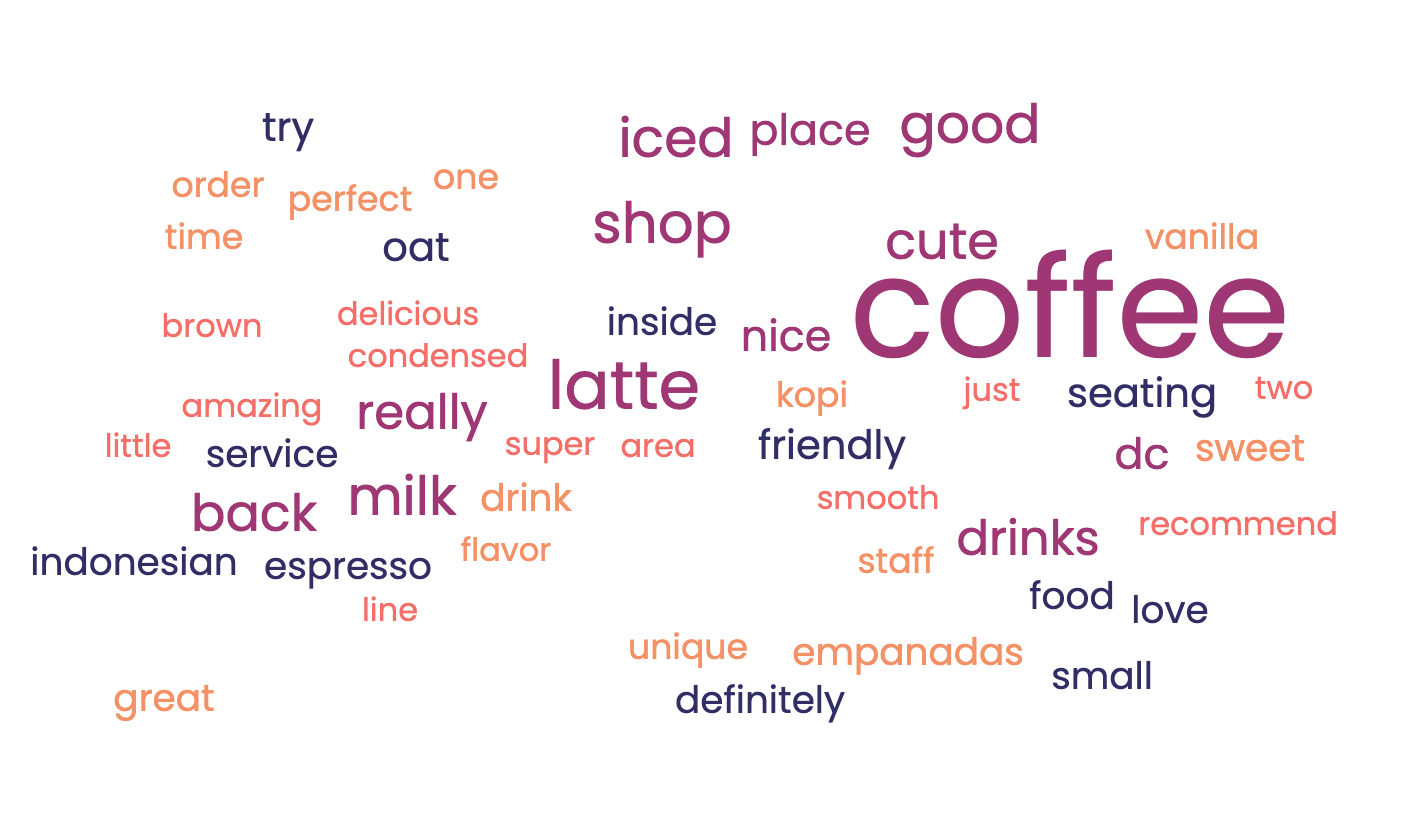

In [ ]:
!jupyter nbconvert --to html /content/MunggaranAssignment3.ipynb

[NbConvertApp] WARNING | pattern '/content/MunggaranAssignment3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T